# 級数

黒木玄

2018-04-18

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/02%20series.ipynb

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f">WindowsへのJulia言語のインストール</a>

を参照せよ.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#級数" data-toc-modified-id="級数-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>級数</a></span><ul class="toc-item"><li><span><a href="#絶対収束と条件収束" data-toc-modified-id="絶対収束と条件収束-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>絶対収束と条件収束</a></span><ul class="toc-item"><li><span><a href="#絶対収束と条件収束の定義" data-toc-modified-id="絶対収束と条件収束の定義-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>絶対収束と条件収束の定義</a></span></li><li><span><a href="#絶対収束級数の収束先は和を取る順番によらないこと" data-toc-modified-id="絶対収束級数の収束先は和を取る順番によらないこと-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>絶対収束級数の収束先は和を取る順番によらないこと</a></span></li></ul></li><li><span><a href="#絶対収束級数の例" data-toc-modified-id="絶対収束級数の例-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>絶対収束級数の例</a></span><ul class="toc-item"><li><span><a href="#絶対収束級数の例1" data-toc-modified-id="絶対収束級数の例1-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>絶対収束級数の例1</a></span></li><li><span><a href="#絶対収束級数の例2" data-toc-modified-id="絶対収束級数の例2-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>絶対収束級数の例2</a></span></li></ul></li><li><span><a href="#条件収束級数の例" data-toc-modified-id="条件収束級数の例-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>条件収束級数の例</a></span><ul class="toc-item"><li><span><a href="#条件収束級数の例1" data-toc-modified-id="条件収束級数の例1-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>条件収束級数の例1</a></span></li><li><span><a href="#Euler変換による交代級数の数値計算" data-toc-modified-id="Euler変換による交代級数の数値計算-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Euler変換による交代級数の数値計算</a></span></li><li><span><a href="#無限和と積分の交換に関する注意" data-toc-modified-id="無限和と積分の交換に関する注意-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>無限和と積分の交換に関する注意</a></span></li><li><span><a href="#条件収束級数の例2" data-toc-modified-id="条件収束級数の例2-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>条件収束級数の例2</a></span></li></ul></li></ul></li><li><span><a href="#複素数の級数" data-toc-modified-id="複素数の級数-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>複素数の級数</a></span><ul class="toc-item"><li><span><a href="#複素数の絶対収束級数" data-toc-modified-id="複素数の絶対収束級数-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>複素数の絶対収束級数</a></span></li><li><span><a href="#条件収束する複素級数の例" data-toc-modified-id="条件収束する複素級数の例-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>条件収束する複素級数の例</a></span></li></ul></li></ul></div>

In [1]:
using Plots
gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy[:init_printing](order="lex") # default
#sympy[:init_printing](order="rev-lex")

using SpecialFunctions
using QuadGK

## 級数

### 絶対収束と条件収束

#### 絶対収束と条件収束の定義

**定理:** $a_n\geqq 0$ であると仮定する. そのとき, ある正の定数 $M$ が存在して, すべての番号 $n$ について $\ds\sum_{k=1}^n a_k\leqq M$ が成立しているならば, 無限級数 $\sum_{n=1}^\infty a_n$ は有限の値に収束する. $\QED$

**定理:** $\ds\sum_{n=1}^\infty |a_n| < \infty$ ならば級数 $\ds\sum_{n=1}^\infty a_n$ は収束する. そのとき, 級数 $\ds\sum_{n=1}^\infty a_n$ は**絶対収束する**という. $\QED$

逆は成立しないことに注意に注意せよ. 級数 $\ds\sum_{n=1}^\infty a_n$ が収束していても $\ds\sum_{n=1}^\infty |a_n| = \infty$ となる場合がある. そのとき, 級数 $\ds\sum_{n=1}^\infty a_n$ は**条件収束する**という.

**注意:** 上の定理は $a_n$ が実数列でも複素数列でも成立している. さらに $a_n$ が $\R^n$ や $\C^n$ の点列でかつ絶対値をノルムで置き換えた場合にも成立している. 直観的には「長さが有限の紐の先端に対応する点が収束先として存在する」というような発想で考えればよい.

より一般にはノルム空間においては上の定理が成立することと完備性の条件は同値になっている. 実数列の場合には**実数の連続性**と同値になっている.

**実数の連続性**について理解していなくても, 絶対収束の概念を理解していれば足りることは多い. $\QED$

#### 絶対収束級数の収束先は和を取る順番によらないこと

**定理:** 絶対収束する無限級数の収束先は足し上げる順序をどのように変えても同じになる.  $\QED$

**系:** 特に $a_n\geqq 0$ のとき $a_1,a_2,\ldots$ の無限和は足し上げる順序をどのように変えても同じになる. $\QED$

**注意:** $a_n\geqq 0$ のとき $a_1,a_2,\ldots$ の無限和の値として $\infty$ も許せば, その無限和は常に値を持っているとみなせる.  非負の実数の無限和を扱うときには収束先として $\infty$ も許したくなる場合が多いので, その場合には収束先が有限の値になるか否かを明瞭に述べておいた方が誤解が少なくなる. $\QED$

**注意:** 条件収束級数の収束先は足し上げる順序によって変わるので扱いには注意が必要になる. $\QED$

### 絶対収束級数の例

#### 絶対収束級数の例1

$s>1$ と仮定する. このとき $\ds\sum_{n=1}^\infty \frac{1}{n^s} < \infty$ である. なぜならば $n\to\infty$ のとき

$$
\sum_{k=1}^n \frac{1}{k^s} \leqq 1 + \int_1^n \frac{dx}{x^s} = 
1 + \frac{1-n^{1-s}}{s-1} \to 1 + \frac{1}{s-1}.
$$

これより $s>1$ のとき

$$
\sum_{n=1}^\infty \frac{1}{n^s} \leqq 1 + \frac{1}{s-1}
$$

となることがわかった. $s>1$ の函数 $\zeta(s)$ を

$$
\zeta(s) = \sum_{n=1}^\infty \frac{1}{n^s}
$$

と定める.  これを**Riemannのゼータ函数**と呼ぶ. Riemannのゼータ函数の定義域は $s\ne 1$ の複素数全体に自然に拡張される(解析接続される).  Riemannのゼータ函数は整数論における最も基本的で重要な函数である.

$s > 1$ のとき, $\ds\sum_{n=1}^\infty\frac{(-1)^{n-1}}{n^s}$ は絶対収束級数である.  この級数は後で示すように $s=1$ でも収束している.  (さらに複素平面全体に解析接続されることも示せる.)

**問題:** $s>1$ と仮定する. この仮定のもとで次の公式を証明せよ:

$$
(1-2^{1-s})\zeta(s) = \sum_{n=1}^\infty\frac{(-1)^{n-1}}{n^s}.
$$

**証明:** 絶対収束級数を扱っているので, 以下のように形式的に計算した結果がそのまま証明になる.

$$
\begin{aligned}
(1-2^{1-s})\zeta(s) &=
\left(1-\frac{2}{2^s}\right)\sum_{n=1}^\infty\frac{1}{n^s} =
\sum_{n=1}^\infty\frac{1}{n^s} - \sum_{n=1}^\infty\frac{2}{(2n)^s}
\\ &=
\left(\frac{1}{1^s}+\frac{1}{2^s}+\frac{1}{3^s}+\frac{1}{4^s}+\cdots\right)
-\left(\frac{2}{2^s}+\frac{2}{4^s}+\cdots\right)
\\ &=
\frac{1}{1^s}-\frac{1}{2^s}+\frac{1}{3^s}-\frac{1}{4^s}+\cdots =
\sum_{n=1}^\infty\frac{(-1)^{n-1}}{n^s}.
\qquad\QED
\end{aligned}
$$

**問題:** $\zeta(2)$ を数値計算して, $\pi^2/6$ に近いことを確認せよ.

In [2]:
N = 10^8
SimpleSum = sum(n->1/n^2, 1:N)
TrueValue = π^2/6
@show SimpleSum
@show TrueValue
@show SimpleSum - TrueValue;

SimpleSum = 1.6449340568482278
TrueValue = 1.6449340668482264
SimpleSum - TrueValue = -9.99999860695766e-9


**問題:** $\zeta(2)=\pi^2/6$ の証明について調べよ.

**ヒント:** この問題は**Basel問題**などと呼ばれているようである. インターネットで検索してみよ. $\QED$

正の偶数 $2m$ について $\zeta(2m)$ はすべて計算されている. しかし, 3以上の奇数 $2m+1$ に対する $\zeta(3m+1)$ の数学的な素性はまだよくわかっていない.

#### 絶対収束級数の例2

**問題:** $\ds\sum_{n=2}^\infty(\zeta(n)-1)=1$ を示せ.

**証明:** $k\geqq 2$ のとき

$$
\ds\sum_{n=2}^\infty\frac{1}{k^n} = \frac{1/k^2}{1-1/k} = \frac{1}{k(k-1)} = \frac{1}{k-1} - \frac{1}{k}.
$$

そして

$$
\zeta(n) - 1 = \frac{1}{2^n}+\frac{1}{3^n}+\frac{1}{4^n}+\cdots =
\sum_{k=2}^\infty\frac{1}{k^n}
$$

なので, 

$$
\begin{aligned}
\sum_{n=2}^\infty (\zeta(n)-1) &=
\sum_{n=2}^\infty\sum_{k=2}^\infty\frac{1}{k^n} =
\sum_{k=2}^\infty\sum_{n=2}^\infty\frac{1}{k^n} =
\sum_{k=2}^\infty\left(\frac{1}{k-1} - \frac{1}{k}\right) 
\\ &=
\left(\frac{1}{1} - \frac{1}{2}\right) + 
\left(\frac{1}{2} - \frac{1}{3}\right) + 
\left(\frac{1}{3} - \frac{1}{3}\right) + 
\cdots =
1.
\end{aligned}
$$

2つ目の等号で $1/k^n\geqq 0$ なので足し上げる順序を変えても総和は等しいことを使った. $\QED$

以下はコンピューターによる計算.

In [3]:
N = 50
sum(n->zeta(n)-1, 2:N)

1.0000000000000044

In [4]:
l, n = symbols("l n", integer=true, positive=true) # l = k-1
s = simplify(doit(Sum(1/(l+1)^n, (n,2,oo))))
S = doit(Sum(s, (l,1,oo)))

1

**問題:** 上の問題の結果より, $\ds\sum_{n=2}^\infty(-1)^n(\zeta(n)-1)$ は絶対収束する. その収束先を求めよ.

**証明:** $k\geqq 2$ のとき

$$
\ds\sum_{n=2}^\infty\frac{(-1)^n}{k^n} = \frac{1/k^2}{1+1/k} = \frac{1}{k(k+1)} = \frac{1}{k} - \frac{1}{k+1}.
$$

そして

$$
(-1)^n(\zeta(n) - 1) = \frac{(-1)^n}{2^n}+\frac{(-1)^n}{3^n}+\frac{(-1)^n}{4^n}+\cdots =
\sum_{k=2}^\infty\frac{(-1)^n}{k^n}
$$

なので, 

$$
\begin{aligned}
\sum_{n=2}^\infty (\zeta(n)-1) &=
\sum_{n=2}^\infty\sum_{k=2}^\infty\frac{(-1)^n}{k^n} =
\sum_{k=2}^\infty\sum_{n=2}^\infty\frac{(-1)^n}{k^n} =
\sum_{k=2}^\infty\left(\frac{1}{k} - \frac{1}{k+1}\right) 
\\ &=
\left(\frac{1}{2} - \frac{1}{3}\right) + 
\left(\frac{1}{3} - \frac{1}{4}\right) + 
\left(\frac{1}{4} - \frac{1}{5}\right) + 
\cdots =
\frac{1}{2}.
\end{aligned}
$$

2つ目の等号で絶対収束級数なので足し上げる順序を変えても総和は等しいことを使った. $\QED$

以下はコンピューターによる計算.

In [5]:
N = 50
sum(n->(-1)^n*(zeta(n)-1), 2:N)

0.5000000000000018

In [6]:
l, n = symbols("l n", integer=true, positive=true) # l = k-1
s = simplify(doit(Sum((-1)^n/(l+1)^n, (n,2,oo))))
S = doit(Sum(s, (l,1,oo)))

1/2

**問題:** 以上の例以外の絶対収束級数の例について調べ, ノートにまとめよ.

### 条件収束級数の例

**定理:** 一般に $a_1\geqq a_2\geqq a_3\geqq\cdots$ かつ $a_n\geqq 0$ かつ $a_n\to 0$ のとき, **交代級数**

$$
\sum_{n=1}^\infty (-1)^{n-1} a_n = a_1 - a_2 + a_3 - a_4 + \cdots
$$

は収束する. $\QED$

この定理中の $a_n$ について $\ds\sum_{n=1}^\infty a_n=\infty$ が成立しているとき, 交代級数は条件収束級数になる.

#### 条件収束級数の例1

$\ds\sum_{n=1}^\infty\frac{(-1)^{n-1}}{n}$ は収束するが, $\ds\sum_{n=1}^\infty\frac{1}{n}=\infty$ となる.

なぜならば, $\ds\sum_{k=1}^n \frac{1}{k} \geqq \int_1^{n+1}\frac{dx}{x} = \log(n+1) \to \infty$ ($n\to\infty$) が成立するからである.

**問題:** $\ds\sum_{n=1}^\infty\frac{(-1)^{n-1}}{n}$ を求めよ. 

**解答:** $\log 2$.

**証明:** 一般に

$$
\int_1^x \frac{dt}{t} = \log x.
$$

ゆえに, 

$$
\int_0^1\frac{dx}{1+x} = \int_1^2 \frac{dy}{y} = \log 2.
$$

一方, $|x|<1$ のとき

$$
\frac{1}{1+x} = 1 - x + x^2 - x^3 + \cdots
$$

なので

$$
\int_0^1 \frac{dx}{1+x} = 
\int_0^1 (1 - x + x^2 - x^3 + \cdots) =
1 - \frac{1}{2} + \frac{1}{3} - \frac{1}{4} + \cdots =
\sum_{n=1}^\infty \frac{(-1)^{n-1}}{n}.
$$

したがって,  

$$
\int_0^1 \frac{dx}{1+x} = \log 2 = \sum_{n=1}^\infty \frac{(-1)^{n-1}}{n}.
\qquad \QED
$$

以下はコンピューターによる計算.

In [7]:
n = symbols("n", integer=true)
S = doit(Sum((-1)^(n-1)/n, (n, 1, oo)))

log(2)

In [8]:
N = 1000
SimpleSum = sum(n->(-1)^(n-1)/n, 1:N)
TrueValue = log(2)
@show SimpleSum
@show TrueValue
@show SimpleSum - TrueValue;

SimpleSum = 0.6926474305598223
TrueValue = 0.6931471805599453
SimpleSum - TrueValue = -0.0004997500001230337


#### Euler変換による交代級数の数値計算

$\ds\sum_{n=1}^N\frac{(-1)^{n-1}}{n}$ で $N=1000$ としても収束先の値を小数点以下第2桁までしか再現してくれない. 一般に条件収束する交代級数を定義通り足し上げると収束は遅い.

収束を加速するための様々な方法が知られているが, 交代級数の場合には**Euler変換**が有名である. 詳しくは

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/4a8fea5e2ed1b4e3b737c99acf237042">交代ゼータ函数のオイラー変換</a>

を参照せよ. 交代級数 $\ds\sum_{k=0}^\infty (-1)^k a_k$ のEuler変換の結果は

$$
\lim_{L\to\infty} \sum_{k=0}^{L-1} w^{(L)}_k (-1)^k a_k, \qquad
w^{(L)}_k = \sum_{n=k}^{L-1} 2^{-n-1}\binom{n}{k}.
$$

すなわち交代級数のEuler変換は交代級数の各項にウェイト $w^{(L)}_k$ をかけてから $L\to\infty$ の極限を取る形になる.

以下のようにEuler変換を使えば数十項で精密な計算が可能になる.

In [9]:
binom(n,k) = exp(lgamma(n+1) - lgamma(k+1) - lgamma(n-k+1))

struct EulerWeight{T} W::T end
function EulerWeight(; Lmax=2^6)
    W = zeros(Lmax,Lmax)
    for L in 1:Lmax
        for k in 0:L-1
            W[L,k+1] = sum(n->2.0^(-n-1)*binom(n,k), k:L-1)
        end
    end
    EulerWeight(W)
end
(eulerweight::EulerWeight)(L,k) = eulerweight.W[L,k+1]
eulerweight = EulerWeight()

EulerWeight{Array{Float64,2}}([0.5 0.0 … 0.0 0.0; 0.75 0.25 … 0.0 0.0; … ; 1.0 1.0 … 1.0842e-19 0.0; 1.0 1.0 … 3.52366e-18 5.42101e-20])

In [10]:
L = 2^6
EulerTran = sum(k->eulerweight(L,k)*(-1)^k/(k+1), 0:L-1)
TrueValue = log(2)
@show EulerTran
@show TrueValue
@show EulerTran - TrueValue

EulerTran = 0.6931471805599451
TrueValue = 0.6931471805599453
EulerTran - TrueValue = -2.220446049250313e-16


-2.220446049250313e-16

Euler変換を使うと, 次のセルのように $\zeta(s)$ の非自明な零点をプロットすることができる.

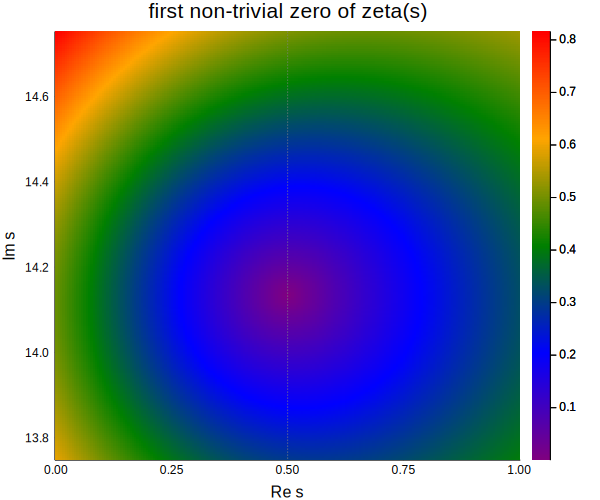

In [11]:
f(s) = sum(k -> eulerweight(L,k)*(-1)^k/(1+k)^s, 0:L-1)/(1-2^(1-s))
x = 0.0:0.005:1.0
y = 13.75:0.005:14.75
z = x' .+ im.*y
w = f.(z)
plot(size=(600, 500), title="first non-trivial zero of zeta(s)")
heatmap!(x, y, abs.(w), color=:rainbow, xlabel="Re s", ylabel="Im s")
vline!([0.5], color="gray", ls=:dot, label="")

複素平面における実部が $0$ から $1$ の縦に無限に長い帯状の領域を $\zeta(s)$ の critical strip と呼ぶ.  $\zeta(s)$ の critical strip における零点を $\zeta(s)$ の非自明な零点と呼ぶ.

**Riemann予想:** $\zeta(s)$ の非自明な零点の実部はすべて $1/2$ である. $\QED$

この予想は非常に有名であり, もしも証明されれば素数の分布に関する精密な評価が得られる.

**問題:** $\zeta(s)$ のcritical stripにおける様子をプロットせよ. $\QED$

#### 無限和と積分の交換に関する注意

上では $\int_0^1 x^n\,dx = 1/(n+1)$ となることと, 無限和 $1-x+x^2-x^3+\cdots$ と積分 $\int_0^1 dx$ の順序を交換できることを用いた. 

無限和と積分の順序交換が可能なことは以下のようにして確認できる. まず $|x|<1$ で

$$
\frac{1}{1+x} = 1 - x + x^2 - x^3 + \cdots + (-1)^{N-1}x^{N-1}+(-1)^N\frac{x^N}{1+x}
$$

となることを確認せよ. この公式を使うと, 

$$
\int_0^1\frac{dx}{1+x} = 
1-\frac{1}{2}+\frac{1}{3}+(-1)^{N-1}\frac{1}{N} + (-1)^N\int_0^1 \frac{x^N}{1+x}\,dx
$$

さらに $0\leqq x\leqq 1$ のとき, $1 \leqq 1+x$ なので

$$
0 \leqq \frac{x^N}{1+x} \leqq x^N
$$

となるから, 

$$
0\leqq \int_0^1 \frac{x^N}{1+x}\,dx \leqq \int_0^1 x^N\,dx = \frac{1}{N+1}
$$

なので, $N\to\infty$ で

$$
\int_0^1 \frac{x^N}{1+x}\,dx \to 0.
$$

以上合わせると, 

$$
\int_0^1\frac{dx}{1+x} = 
\lim_{N\to\infty} \sum_{n=1}^N \frac{(-1)^{n-1}}{n} = \sum_{n=1}^\infty \frac{(-1)^{n-1}}{n}
$$

となることがわかる.

#### 条件収束級数の例2

**問題:** $\ds\sum_{n=1}^\infty\frac{(-1)^{n-1}}{2n-1}$ を求めよ.

**答え:** $\pi/4$.

**証明:** $a = \tan\theta$ の $-\pi/2<\theta<\pi/2$ における逆函数を $\theta = \arctan a$ と書くと,

$$
\int_0^a \frac{dt}{1+t^2} = \arctan a.
$$

この公式は左辺で $t=\tan\theta$ と置換すれば確認できる.

ゆえに, 

$$
\int_0^1\frac{dx}{1+x^2} = \arctan 1 = \frac{\pi}{4}
$$

一方, $|x|<1$ のとき

$$
\frac{1}{1+x^2} = 1 - x^2 + x^4 - x^6 + \cdots
$$

なので

$$
\int_0^1 \frac{dx}{1+x^2} = 
\int_0^1 (1 - x^2 + x^4 - x^6 + \cdots) =
1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \cdots =
\sum_{n=1}^\infty \frac{(-1)^{n-1}}{2n-1}.
$$

したがって,  

$$
\int_0^1 \frac{dx}{1+x^2} = \arctan 1 = \frac{\pi}{4} = \sum_{n=1}^\infty \frac{(-1)^{n-1}}{2n-1}.
\qquad\QED
$$

以下はコンピューターによる計算.

In [12]:
n = symbols("n", integer=true)
S = doit(Sum((-1)^(n-1)/(2n-1), (n, 1, oo)))

pi
--
4 

In [13]:
N = 10^8
SimpleSum = sum(n->(-1)^(n-1)/(2n-1), 1:N)
TrueValue = π/4
@show SimpleSum
@show TrueValue
@show SimpleSum - TrueValue;

SimpleSum = 0.7853981608974486
TrueValue = 0.7853981633974483
SimpleSum - TrueValue = -2.499999651739415e-9


In [14]:
L = 2^6
EulerTran = sum(k->eulerweight(L,k)*(-1)^k/(2k+1), 0:L-1)
TrueValue = π/4
@show EulerTran
@show TrueValue
@show EulerTran - TrueValue

EulerTran = 0.7853981633974486
TrueValue = 0.7853981633974483
EulerTran - TrueValue = 3.3306690738754696e-16


3.3306690738754696e-16

**問題:** 以上の計算における無限和と積分の正当化を自分で行ってみよ. $\QED$

**問題:** 以上の例以外の条件収束級数の例について調べ, ノートにまとめよ. $\QED$

以下はコンピューターによる $\ds\int_0^1\frac{dx}{1+x^3}$ や $\ds\int_0^1\frac{dx}{1+x^4}$ などの計算.

In [15]:
x = symbols("x", real=true, positive=true)
integrate(1/(1+x^3), (x,0,1))

           ___   
log(2)   \/ 3 *pi
------ + --------
  3         9    

In [16]:
n = symbols("n", integer=true, positive=true)
S = doit(Sum((-1)^(n-1)/(3n-2), (n,1,oo)))

          -5*I*pi     /     2*I*pi\    -I*pi     /     -2*I*pi \
          --------    |     ------|    ------    |     --------|
             3        |       3   |      3       |        3    |
log(2)   e        *log\1 + e      /   e      *log\1 + e        /
------ - -------------------------- - --------------------------
  3                  3                            3             

In [17]:
x = symbols("x", real=true, positive=true)
integrate(x/(1+x^3), (x,0,1))

             ___   
  log(2)   \/ 3 *pi
- ------ + --------
    3         9    

In [18]:
n = symbols("n", integer=true, positive=true)
S = doit(Sum((-1)^(n-1)/(3n-1), (n,1,oo)))

            -2*I*pi     /     -2*I*pi \    -10*I*pi     /     2*I*pi\
            --------    |     --------|    ---------    |     ------|
               3        |        3    |        3        |       3   |
  log(2)   e        *log\1 + e        /   e         *log\1 + e      /
- ------ - ---------------------------- - ---------------------------
    3                   3                              3             

In [19]:
x = symbols("x", real=true, positive=true)
integrate(1/(1+x^4), (x,0,1))

    ___    /    ___    \     ___    /  ___    \     ___   
  \/ 2 *log\- \/ 2  + 2/   \/ 2 *log\\/ 2  + 2/   \/ 2 *pi
- ---------------------- + -------------------- + --------
            8                       8                8    

In [20]:
n = symbols("n", integer=true, positive=true)
S = doit(Sum((-1)^(n-1)/(4n-3), (n,1,oo)))

     -I*pi     /     3*I*pi\    -I*pi     /     I*pi\      -I*pi     /     -I*
     ------    |     ------|    ------    |     ----|      ------    |     ---
       4       |       4   |      4       |      4  |        4       |       4
  I*e      *log\1 + e      /   e      *log\1 + e    /   I*e      *log\1 + e   
- -------------------------- + ---------------------- + ----------------------
              4                          4                          4         

pi \    -I*pi     /     -3*I*pi \
---|    ------    |     --------|
   |      4       |        4    |
   /   e      *log\1 + e        /
---- - --------------------------
                   4             

In [21]:
x = symbols("x", real=true, positive=true)
s = symbols("s", real=true, positive=true)
J = simplify(integrate(1/(1+x^(1/s)), (x,0,1)))

          / I*pi      \
s*lerchphi\e    , 1, s/

## 複素数の級数

この節では複素数 $a_n$ の級数 $\ds\sum_{n=1}^\infty a_n$ を扱う.

### 複素数の絶対収束級数

**定理:** 複素数 $a_1,a_2,\ldots$ について, 級数 $\ds\sum_{n=1}^\infty |a_n|$ が有限の値に収束するならば, 級数 $\ds\sum_{n=1}^\infty a_n$ も収束する. このとき, 級数 $\ds\sum_{n=1}^\infty a_n$ は**絶対収束**するという. $\QED$

絶対収束していないが収束する級数は**条件収束**するという.

上の定理の証明は略す. しかし, 下の方で, 級数 $\ds\sum_{n=1}^\infty |a_n|$ が有限の値に収束するならば, 級数 $\ds\sum_{n=1}^\infty a_n$ も収束する直観的な理由を説明する.

**例:** $\theta$ は実数であるとする. このとき, 複素級数 $\ds\sum_{n=1}^\infty\frac{e^{in\theta}}{n^{3/2}}$ は絶対収束する. 以下のセルにおける計算とプロットを参照せよ.

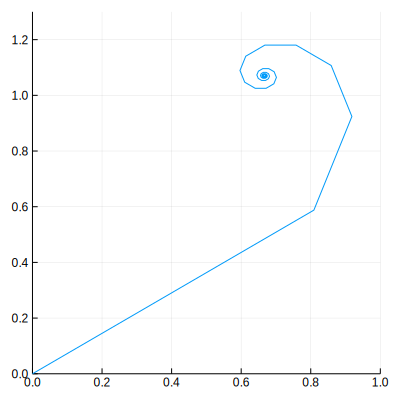

In [22]:
θ = 2π/10
a(n) = exp(im*n*θ)/n^1.5
sum_a(n) = iszero(n) ? Complex(0.0) : sum(k->a(k), 1:n)
N = 70
n = 0:N
z = sum_a.(n)
plot(size=(400, 400), xlims=(0,1.0), ylim=(0,1.3))
plot!(real.(z), imag.(z), legend=false)#, line=:arrow)

  2.777116 seconds (19.47 M allocations: 502.185 MiB, 3.40% gc time)
  0.850725 seconds (89.10 k allocations: 4.771 MiB)


INFO: Saved animation to C:\Users\genkuroki\OneDrive\Calculus\sum_a.gif



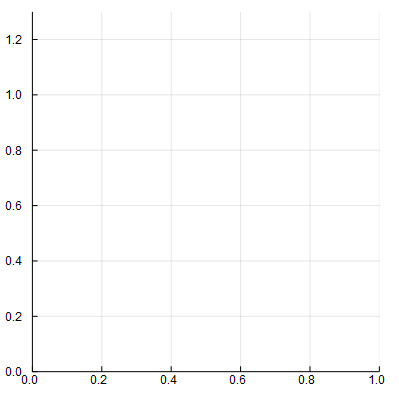

In [23]:
θ = 2π/10
a(n) = exp(im*n*θ)/n^1.5
sum_a(n) = iszero(n) ? Complex(0.0) : sum(k->a(k), 1:n)
@time anim = @animate for N in 0:70
    n = 0:N
    z = sum_a.(n)
    plot(size=(400, 400), xlims=(0,1.0), ylim=(0,1.3))
    plot!(real.(z), imag.(z), legend=false, line=:arrow)
end

gifname = "sum_a.gif"
@time gif(anim, gifname; fps=10)
sleep(0.1)
showimg("image/gif", gifname)

**絶対収束の概念の直観的な説明:**

各複素数 $a_n$ は平面上の点と同一視できる(複素平面の考え方).

平面上の点と原点からその点への矢線(ベクトル)は同一視できる(ベクトルの考え方).

複素数の和はベクトルの和に対応している.

ベクトルの和は矢線としてのベクトルを連結することを意味する(ベクトルの和の幾何学的意味).

ゆえに, $\ds s_N = \sum_{n=1}^N a_n$ は各 $a_1,a_2,\ldots,a_N$ の各々に対応する矢線を連結して得られる折れ線の先端の点に対応する複素数に等しい.

$\ds L = \sum_{n=1}^\infty|a_n|$ は各 $a_n$ に対応する矢線の長さの総和を意味する. 

ゆえに, $L$ が有限の値になることは, 各 $a_n$ に対応する矢線をすべて連結して得られる折れ線の長さが有限になることを意味する.

そのとき, $a_n$ に対応する矢線をすべて連結して得られる折れ線の「先端」の点に対応する複素数が級数 $\ds \sum_{n=1}^\infty a_n$ の収束先になる.

1つ前のセルのアニメーションはそのような様子の一例になっている.

**注意:** 上の説明を理解できれば, 級数 $\ds\sum_{n=1}^\infty |a_n|$ が有限の値に収束するならば, 級数 $\ds\sum_{n=1}^\infty a_n$ も収束することも十分に納得できると思う. その直観は数学的には<a href="https://www.google.co.jp/search?q=%E5%AE%8C%E5%82%99%E6%80%A7+%E7%B5%B6%E5%AF%BE%E5%8F%8E%E6%9D%9F">**完備性**</a>の概念によって正当化される. $\QED$

### 条件収束する複素級数の例

**例:** $\theta$ は実数であり, $e^{i\theta}\ne 1$ であると仮定する. このとき $\ds\sum_{n=1}^\infty\frac{e^{in\theta}}{n}$ は条件収束する. $\QED$

**例の解説のための一般論:** 一般に $\ds S_n = \sum_{k=1}^n a_k b_k$ のとき, $\ds A_k = \sum_{j=1}^k a_j$, $A_0=0$ とおくと, $a_k = A_k - A_{k-1}$ なので

$$
\begin{aligned}
S_n &= \sum_{k=1}^n (A_k - A_{k-1}) b_k =
\sum_{k=1}^n A_k b_k - \sum_{k=0}^{n-1} A_k b_{k+1}
\\ &=
A_n b_n - A_0 b_1 + \sum_{k=1}^{n-1} A_k(b_k - b_{k+1}).
\end{aligned}
$$

この公式は部分積分の公式の和に関するバージョンであることに注意せよ. (「部分積分」のアイデアは普遍的によく現われる.)

仮定の追加1: 数列 $b_k$ は単調減少実数列でかつ $0$ に収束すると仮定する.

このとき, $b_k-b_{k+1}\geqq 0$ でかつ

$$
\sum_{k=1}^{n-1} (b_k - b_{k+1}) = b_1 - b_n \to b_1 \quad (n\to\infty).
$$

仮定の追加2: $A_k$ は有界数列であると仮定する. すなわちある正の実数で $|A_k|\leqq M$ ($k=1,2,\ldots$) を満たすものが存在すると仮定する.

このとき, 

$$
\sum_{k=1}^\infty|A_k||b_k-b_{k+1}|\leqq
M\sum_{k=1}^\infty(b_k-b_{k+1}) = M b_1 < \infty
$$

なので 級数 $\ds\sum_{k=1}^\infty A_k(b_{k+1} - b_k)$ は絶対収束する. さらに, $n\to\infty$ で $b_n\to 0$ なので $A_n b_n\to 0$ となる. ゆえに級数 $\ds\sum_{k=1}^\infty a_k b_k$ は収束する. (積分の場合にも, 絶対収束しない積分を部分積分によって絶対収束する積分に変形できる場合がある. 各自自分で研究してみよ.) $\QED$

**例の解説:** 以上の一般論を上の例に適用しよう. すなわち $a_n = e^{in\theta}$, $b_n=1/n$ の場合を考える. このとき

$$
A_k = \sum_{j=1}^k a_j = \frac{e^{i\theta}-e^{i(n+1)\theta}}{1-e^{i\theta}}
$$

であるから, $|A_k|\leqq 2/|1-e^{i\theta}|$ なので, $A_k$ は有界である. 実数列 $b_k$ は単調減少しながら $0$ に収束する. したがって上の一般論より, 級数 $\ds\sum_{n=1}^\infty\frac{e^{in\theta}}{n}$ は条件収束する. $\QED$

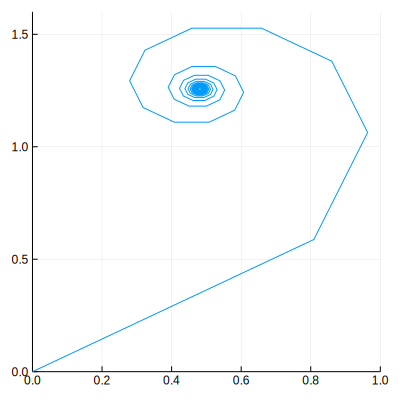

In [24]:
θ = 2π/10
a(n) = exp(im*n*θ)/n
sum_a(n) = iszero(n) ? Complex(0.0) : sum(k->a(k), 1:n)
N = 400
n = 0:N
z = sum_a.(n)
plot(size=(400, 400), xlims=(0,1.0), ylim=(0,1.6))
plot!(real.(z), imag.(z), legend=false)#, line=:arrow)

  4.375724 seconds (40.28 M allocations: 1.076 GiB, 5.28% gc time)
  0.669510 seconds (1.05 k allocations: 69.656 KiB)


INFO: Saved animation to C:\Users\genkuroki\OneDrive\Calculus\sum_a.gif



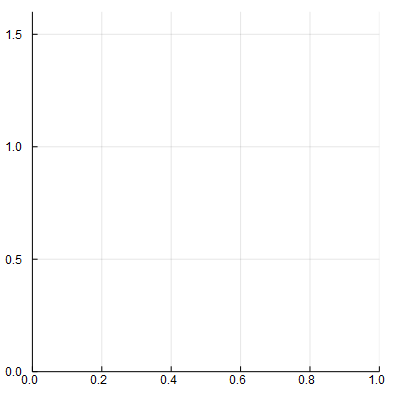

In [25]:
θ = 2π/10
a(n) = exp(im*n*θ)/n
sum_a(n) = iszero(n) ? Complex(0.0) : sum(k->a(k), 1:n)
@time anim = @animate for N in 0:4:400
    n = 0:N
    z = sum_a.(n)
    plot(size=(400, 400), xlims=(0,1.0), ylim=(0,1.6))
    plot!(real.(z), imag.(z), legend=false, line=:arrow)
end

gifname = "sum_a.gif"
@time gif(anim, gifname; fps=10)
sleep(0.1)
showimg("image/gif", gifname)

上のセルのアニメーションの折れ線の長さは無限大である. 無限に長くなる折れ線の先端が無限に回転しながら収束している.